# 人脸识别
在前面的章节我们曾说过，人脸检测是各种后续处理的预操作，其中最常用的后续处理就是人脸识别。人脸识别是基于人的脸部特征信息进行身份识别的一种生物识别技术。用摄像机或摄像头采集含有人脸的图像或视频流，并自动在图像中检测和跟踪人脸，进而对检测到的人脸进行脸部识别的一系列相关技术，通常也叫做人像识别、面部识别。

在FaceAPI这个类中，以下这个接口的功能就是人脸识别：
- extractFeature(img,rect) : 人脸特征提取功能，输入人脸区域，返回Feature，代表描述当前人脸的特征

它的输入是detect出的人脸框，输出是根据人脸框和其中的图像数据进行复杂运算产生的一个一维浮点数组，这个数组我们管它叫人脸的特征，变量名是Feature。

接下来，我们先尝试对一幅图中的人脸提取特征。

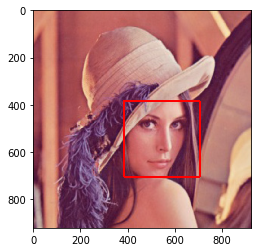

Feature(-0.04,0.11,0.10,-0.12,-0.17,0.02,-0.10,-0.10,0.21,-0.12,0.20,-0.05,-0.25,0.08,-0.03,0.15,-0.18,-0.08,-0.09,-0.12,0.00,0.14,0.07,0.03,-0.10,-0.34,-0.07,-0.08,0.05,-0.09,0.06,0.09,-0.14,0.01,0.06,0.10,-0.00,-0.13,0.09,-0.02,-0.20,-0.07,0.11,0.18,0.16,-0.04,0.09,-0.14,0.12,-0.28,0.03,0.09,0.01,0.05,0.19,-0.24,0.01,0.17,-0.07,0.14,0.09,0.01,0.04,-0.05,0.24,0.04,-0.13,-0.21,0.14,-0.12,-0.08,0.21,-0.12,-0.18,-0.28,-0.03,0.45,0.08,-0.16,0.03,-0.11,-0.04,0.00,0.13,0.02,-0.03,-0.15,0.02,0.30,-0.08,-0.01,0.30,-0.02,0.04,-0.05,0.12,-0.18,-0.00,-0.12,-0.07,0.02,-0.04,-0.08,0.13,-0.20,0.14,-0.05,-0.02,-0.03,-0.01,-0.04,-0.01,0.24,-0.29,0.13,0.19,0.08,0.15,0.02,0.07,0.06,-0.07,-0.12,-0.06,-0.08,-0.09,-0.14,0.05)


In [5]:
from API.FaceAPI_dlib import *
faceAPI = FaceAPI()

img = cv2.imread('data/0.png')
rects = faceAPI.detect(img)
showWithRects(img,rects)
feature = faceAPI.extractFeature(img,rects[0])
print(feature)

可以看到提取出来的特征是一串浮点数，它们组成了一个高维数组，这个数组就代表了一张人脸的特征。

## 人脸比对

人脸特征看起来可能没有人脸框那么直观，它是如何与应用产生联系的呢？人脸识别，顾名思义需要识别出当前人脸是谁，那么如何判断当前的人脸图像和另外一个人脸图像是属于同一个人的呢？此时，人脸比对就派上了用场。通过比对两个不同图像的特征，我们可以得到两张人脸的相似程度，相似程度越高，那么是同一个人的可能性就越大；相似度越低，那么就越不可能是同一个人。

在FaceAPI这个类中，以下这个接口的功能就是人脸识别：
- compare(feature_1, feature_2, threshold=0.5) : 人脸比对功能，输入两个人脸特征，通过阈值判定是否是同一个人

它的输入是两个特征，在内部会计算出一个人脸相似度得分，得分的区间范围是(-1,1)，通过判断得分是否大于阈值threshold，返回两个特征是否属于一个人。

接下来我们提供了三张图片，请尝试判断三张图哪两个是同一个人。

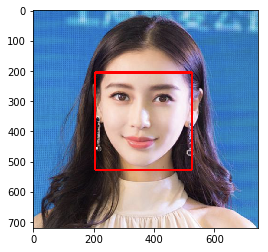

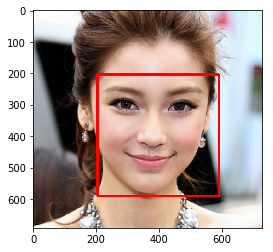

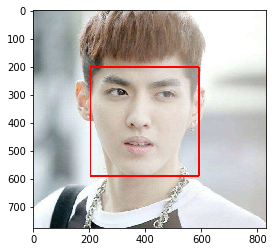

0.9465056809065614
face 0 and 1 : True
0.9040228416720699
face 0 and 2 : True
0.8873430597421526
face 1 and 2: False


In [4]:
img_0 = cv2.imread('data/compare_0.png')
img_1 = cv2.imread('data/compare_1.png')
img_2 = cv2.imread('data/compare_2.png')

rects_0 = faceAPI.detect(img_0)
showWithRects(img_0,rects_0)
feature_0 = faceAPI.extractFeature(img_0,rects_0[0])

rects_1 = faceAPI.detect(img_1)
showWithRects(img_1,rects_1)
feature_1 = faceAPI.extractFeature(img_1,rects_1[0])

rects_2 = faceAPI.detect(img_2)
showWithRects(img_2,rects_2)
feature_2 = faceAPI.extractFeature(img_2,rects_2[0])

print("face 0 and 1 :",faceAPI.compare(feature_0,feature_1))
print("face 0 and 2 :",faceAPI.compare(feature_0,feature_2))
print("face 1 and 2:",faceAPI.compare(feature_1,feature_2))

通过两两判断，我们明显可以看到face0和face1是属于同一个人，face2是另外一个人的脸。